#### ​Initialize, Authenticate, and Configure Remote Execution Environment

##### Start a Cybershuttle Remote Executor: This will submit a remote job to Anvil
- **Cluster** - Anvil & Jetstream
- **Community Allocation** - Gkeyll
- **Requested Resources** 
    - 4 CPUs, 4GB Memory, 60 Minutes, Shared Queue
    - 1 CPUs, 60 Minutes, Cloud Queue

##### This remote job enables the generation of plotE_z with post gkeyll code.


In [1]:
%pip install -qU "airavata-python-sdk[notebook]"
import airavata_jupyter_magic

%authenticate

# PLEASE NOTE: At a given time, ONLY run a single job in one of the available clusters: Anvil OR Jetstream. 
# Anvil is the default cluster and if you need to run on Jetstream; comment the Anvil and uncomment the Jetstream
# Anvil
# %request_runtime test_cpu --file=cybershuttle.yml --group=Gkeyll --walltime=60 --use=AnvilCPU:shared
# Jetstream
%request_runtime test_cpu --file=cybershuttle.yml --group=Gkeyll --walltime=60 --use=Gkeyll:cloud

%wait_for_runtime test_cpu --live
%switch_runtime test_cpu

Note: you may need to restart the kernel to use updated packages.

Loaded airavata_jupyter_magic (2.1.4.post4) 
(current runtime = local)

  %authenticate                              -- Authenticate to access high-performance runtimes.
  %request_runtime <rt> [args]               -- Request a runtime named <rt> with configuration <args>.
                                                Call multiple times to request multiple runtimes.
  %restart_runtime <rt>                      -- Restart runtime <rt> if it hangs. This will clear all variables.
  %stop_runtime <rt>                         -- Stop runtime <rt> when no longer needed.
  %wait_for_runtime <rt>                     -- Wait for runtime <rt> to be ready.
  %switch_runtime <rt>                       -- Switch the active runtime to <rt>. All subsequent cells will run here.
  %%run_on <rt>                              -- Force a cell to always execute on <rt>, regardless of the active runtime.
  %stat_runtime <rt>               

Output()

Authenticated.

Requesting runtime=test_cpu...
[Gkeyll:cloud, 60 Minutes, 1 Node(s), 4 CPU(s), 1 GPU(s), 4096 MB RAM, 1024 MB VRAM]
* modules=[]
* libraries=['python=3.11', 'pip']
* pip=['postgkyl']
* mounts=[]
Requested runtime=test_cpu
Request successful: runtime=test_cpu


Output()

local:/tmp/connection_787uhexk.json --> test_cpu:connection_787uhexk.json... [200]
started proc_name=test_cpu_kernel on rt=test_cpu. pid=8539
forwarding ports=[15260, 15261, 15262, 15263, 15264]
test_cpu:15260 -> access via 18.118.140.230:10000
test_cpu:15261 -> access via 18.118.140.230:10001
test_cpu:15262 -> access via 18.118.140.230:10002
test_cpu:15263 -> access via 18.118.140.230:10003
test_cpu:15264 -> access via 18.118.140.230:10004
started ipykernel tunnels for test_cpu at 18.118.140.230
started ipykernel client for test_cpu
Remote Jupyter kernel launched and connected for runtime=test_cpu.
Switched to runtime=test_cpu.


In [2]:
import os

#Anvil and Jetstream data path
data_path = os.path.expanduser("~/cybershuttle/dataset/Plasma-Vlab-gemReconnection")

executing cell on test_cpu...
waiting for cell to finish on test_cpu...
cell finished on test_cpu.


In [3]:
from pathlib import Path
import matplotlib.pyplot as plt
import postgkyl as pg

run = Path.cwd()

def getModelType():
    frame = 0
    models = ["5m", "10m"]
    for model in models:
        path = Path(f"{data_path}/rt_{model}_gem_gzero-field_{frame}.gkyl")
        if path.is_file():
            return model
    error = "Failed to find input file " + str(path)
    assert False, error

executing cell on test_cpu...
waiting for cell to finish on test_cpu...
cell finished on test_cpu.


In [4]:
frame = 0
model = getModelType()
filename = run / f"{data_path}/rt_{model}_gem_gzero-field_{frame}.gkyl"
filename = str(filename)
print(filename)

executing cell on test_cpu...
waiting for cell to finish on test_cpu...
/home/gateway-user/cybershuttle/dataset/Plasma-Vlab-gemReconnection/rt_5m_gem_gzero-field_0.gkyl
cell finished on test_cpu.


executing cell on test_cpu...
waiting for cell to finish on test_cpu...


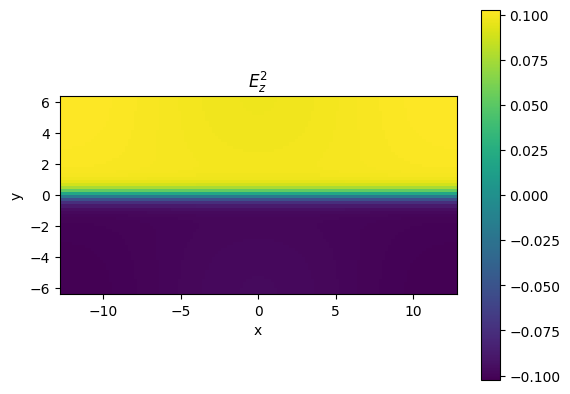

cell finished on test_cpu.


In [5]:
gdata = pg.GData(filename)

vals = gdata.get_values() # cell-center values, shape is Ny * Nx * Ncomponents
grid = gdata.get_grid() # cell corner coordinates
ndim = gdata.get_num_dims() # number of spatial dimensions

assert len(vals.shape) == ndim+1 and len(grid) == ndim

icomp = 3
compName = r'$E_z^2$'
fileName = "E_z.png"

my_vals = vals[..., icomp]
x, y = grid

fig, ax = plt.subplots()

im = ax.pcolormesh(x, y, my_vals.T)
fig.colorbar(im, ax=ax)

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title(compName)
ax.set_aspect(1)

plt.savefig(fileName)

#### To Stop the Agent Run

In [6]:
%stop_runtime test_cpu
%switch_runtime local

Terminated runtime=test_cpu. state={'experimentId': 'CS_Agent_31bf6a35-69ca-474a-9126-843c2e7946f9', 'terminated': True}
Switched to runtime=local.
